<a href="https://colab.research.google.com/github/dhruvb26/u.plan/blob/main/HackHarvard_Satellite_Imagery_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semantic Segmentation of Satellite Imagery Using SAM

  Make sure to change runtime to GPU on Google Collab before running the below cells.

### Install Requirements

In [1]:
!pip install segment-geospatial

In [2]:
!pip install leafmap

### Import Libraries

In [3]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff, get_basemaps

Center -> Latitude and Longitude

In [4]:
m = leafmap.Map(center=[33.4255, -111.9400], zoom=16, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[33.4255, -111.94], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [5]:
output_dir = "/Users/shreyasbachiraju/uhi-satellite-imagery/index-analysis/"
os.makedirs(output_dir, exist_ok=True)
image = os.path.join(output_dir, "tempe_satellite.tif")

In [6]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    # Default bbox for a small area in Tempe
    bbox = [-111.9450, 33.4200, -111.9350, 33.4300]

In [7]:
zoom_level = 17
try:
    tms_to_geotiff(output=image, bbox=bbox, zoom=zoom_level, source="Satellite", overwrite=True)
except Exception as e:
    print(f"Error converting to GeoTIFF: {e}")

Downloaded image 01/20
Downloaded image 02/20
Downloaded image 03/20
Downloaded image 04/20
Downloaded image 05/20
Downloaded image 06/20
Downloaded image 07/20
Downloaded image 08/20
Downloaded image 09/20
Downloaded image 10/20
Downloaded image 11/20
Downloaded image 12/20
Downloaded image 13/20
Downloaded image 14/20
Downloaded image 15/20
Downloaded image 16/20
Downloaded image 17/20
Downloaded image 18/20
Downloaded image 19/20
Downloaded image 20/20
Saving GeoTIFF. Please wait...
Image saved to /Users/shreyasbachiraju/uhi-satellite-imagery/index-analysis/tempe_satellite.tif


In [8]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Tempe Satellite Image", fit_bounds=True)

In [9]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

Model checkpoint for vit_h not found.


Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [01:05<00:00, 39.3MB/s]


In [10]:
sam.generate(image, output=os.path.join(output_dir, "tempe_masks.tif"), foreground=True, unique=True)

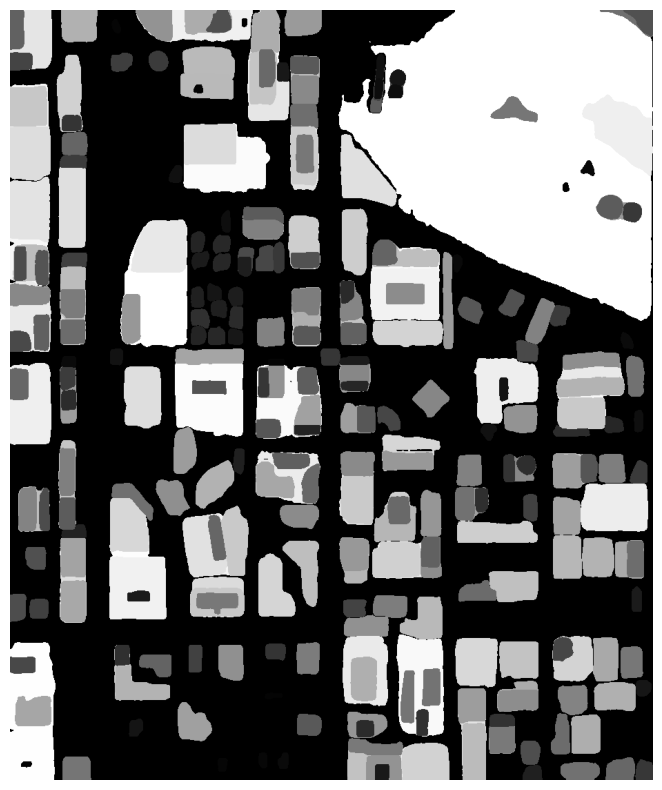

In [11]:
sam.show_masks(cmap="binary_r")

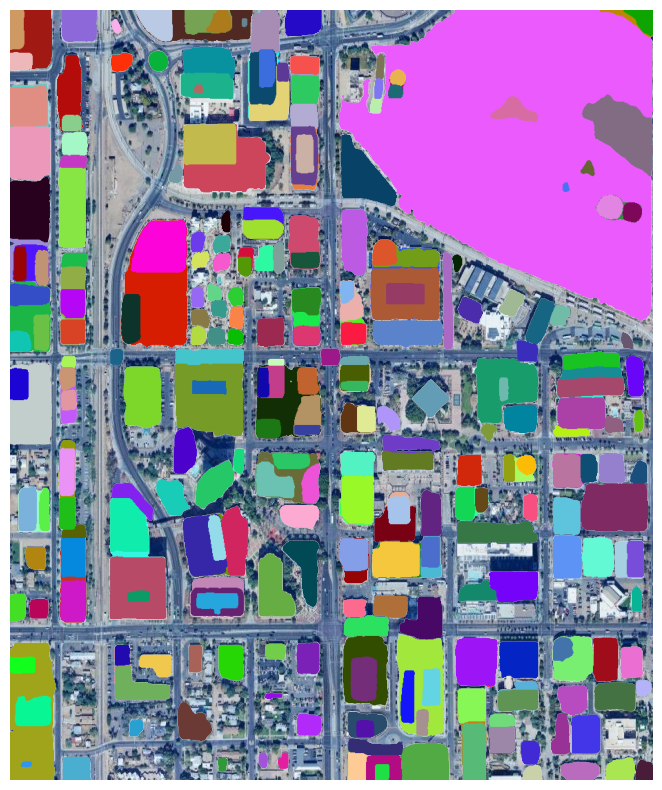

In [12]:
sam.show_anns(axis="off", alpha=1, output=os.path.join(output_dir, "tempe_annotations.tif"))


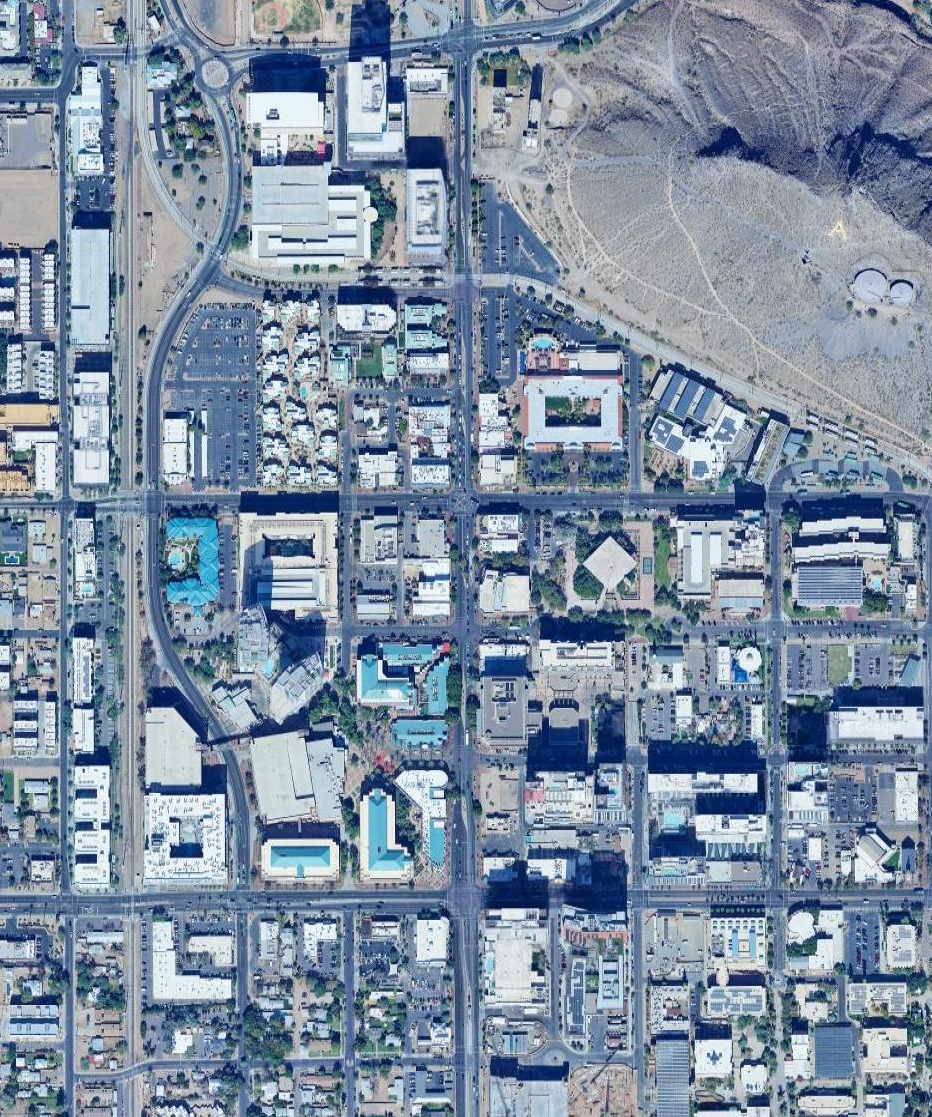
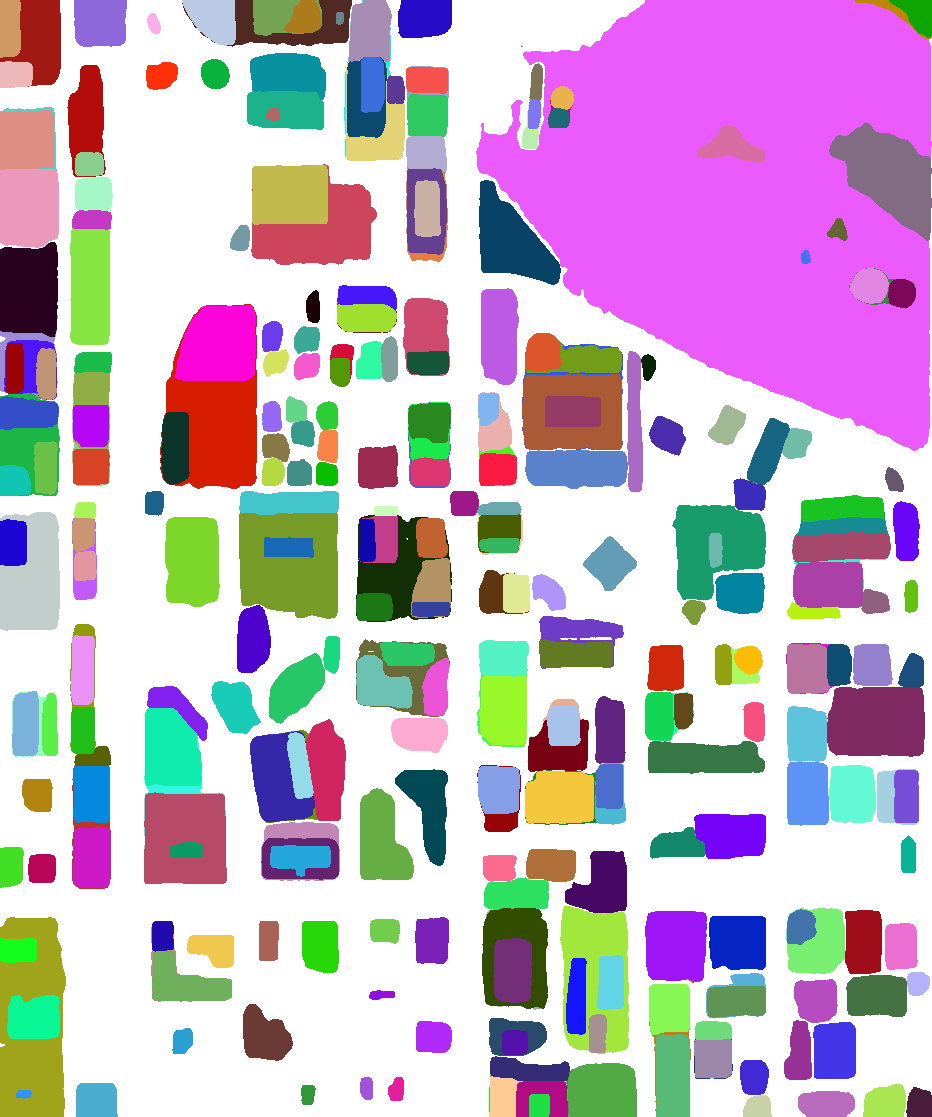

In [13]:
leafmap.image_comparison(
    image,
    os.path.join(output_dir, "tempe_annotations.tif"),
    label1="Tempe Satellite Image",
    label2="Tempe Image Segmentation",
)

In [14]:
m.add_raster(os.path.join(output_dir, "tempe_annotations.tif"), alpha=0.5, layer_name="Tempe Masks")
m

Map(bottom=3367492.0, center=[33.425, -111.94], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zo…